In [1]:
# Import all modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import and read csv kcse_data
kcse_data = pd.read_csv('KCSE_2016.csv')

In [3]:
#Read the first 5 rows of the data
kcse_data.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,FEMALE(2016),58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,MALE(2016),83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,ALL(2016),141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,MALE(2015),2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,FEMALE(2015),661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223


In [4]:
#Read the last 5 rows of the data
kcse_data.tail()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
16,FEMALE(2009),58,218,553,974,1572,2388,3216,3996,4447,4514,3897,1326
17,ALL(2009),196,846,1989,3098,4355,5699,7040,8243,8849,8850,7503,2583
18,MALE(2010),182,892,1787,2458,3094,3639,4168,4536,4704,4561,3776,1306
19,FEMLAE(2010),97,344,744,1219,1875,2722,3637,4389,4734,4769,4012,1304
20,ALL(2010),279,1236,2531,3677,4969,6361,7805,8925,9438,9330,7788,2610


In [5]:
# Split the Gender column into Gender and Year 
#Split the Year column into Year and null then droped the null column
kcse_data[['Gender', 'Year']] = kcse_data['Gender'].str.split('(',1,expand=True)
kcse_data[['Year', 'null']] = kcse_data['Year'].str.split(')',1,expand=True)
kcse_data = kcse_data.drop(columns='null')

In [6]:
#To view the whole data
kcse_data

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
0,FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
1,MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016
2,ALL,141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399,2016
3,MALE,2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127,2015
4,FEMALE,661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223,2015
5,ALL,2685,12069,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350,2015
6,MALE,148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006
7,FEMALE,69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006
8,ALL,217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006
9,MALE,110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779,2007


In [7]:
#The data is sorted by the year
#inplace value used to change the data completely without creating another variable
kcse_data.sort_values(by='Year',inplace=True) 

#replace any gender row containing the word FEMLAE to FEMALE
kcse_data['Gender'] = kcse_data['Gender'].str.replace('FEMLAE','FEMALE')

## Performance Trend (Male vs Female) and All Candidates

### Male vs Female

####  The Trend of Grades in Males and Females Over The Past Years

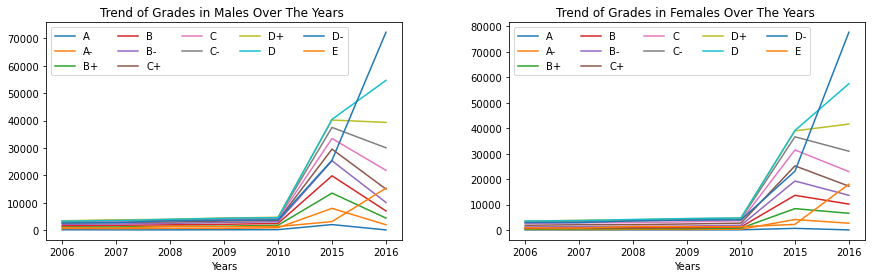

In [8]:
#Filter the data to get candidates with gender name Male or Female
#Droped the column and set index Year
#Plotted Trend of Grades in females and Males over the years using subplot
kcse_males_all_years = kcse_data[kcse_data.Gender.str.startswith("MALE")].drop(columns='Gender').set_index('Year')
kcse_females_all_years = kcse_data[kcse_data.Gender.str.startswith("FEMALE")].drop(columns='Gender').set_index('Year')
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.xlabel('Years')
plt.title("Trend of Grades in Males Over The Years ")
plt.plot(kcse_males_all_years)
plt.legend(kcse_females_all_years.columns,ncol=5)
plt.subplot(1,2,2)
plt.xlabel('Years')
plt.title("Trend of Grades in Females Over The Years ")
plt.plot(kcse_females_all_years)
plt.legend(kcse_females_all_years.columns,ncol=5)
plt.subplots_adjust(wspace=0.3,right=1)


In [9]:
kcse_data.columns

Index(['Gender', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-',
       'E', 'Year'],
      dtype='object')

#### Trend of Performance of Male Candidates and Female Candidates Over  The Past Years

I used the MEAN as a my metrics to evaluate the performance of Both Male and Female Candidates 

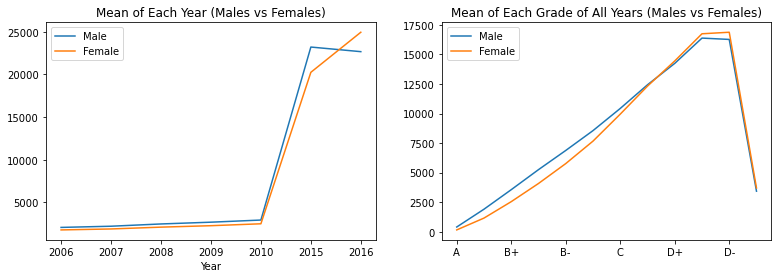

In [10]:
#Mean of Each Year 
kcse_male_mean = kcse_males_all_years.mean(axis=1)
kcse_female_mean = kcse_females_all_years.mean(axis=1)
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title('Mean of Each Year (Males vs Females)')
kcse_male_mean.plot()
kcse_female_mean.plot()
plt.legend(['Male','Female'])

# Mean of Each Grade of All Years
plt.subplot(1,2,2)
plt.title('Mean of Each Grade of All Years (Males vs Females)')
kcse_female_mean_grades = kcse_females_all_years.mean(axis=0)
kcse_male_mean_grades = kcse_males_all_years.mean(axis=0)
kcse_male_mean_grades.plot()
kcse_female_mean_grades.plot()
plt.legend(['Male','Female'])

### All Candidates

#### Trend of Grades of All Candidates Over The Past Years

<AxesSubplot:xlabel='Year'>

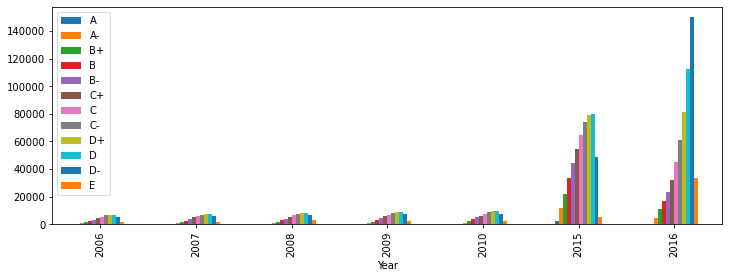

In [11]:
#Filter data to get gender containing all candidates
#Plotted a bar graph of trend of grades of all candidates over the past years
kcse_all_candidates_years = kcse_data[kcse_data.Gender.str.startswith("ALL")].drop(columns='Gender').set_index('Year')
kcse_all_candidates_years.plot(kind='bar',figsize=(12,4))

#### Trend of Performance of All Candidates Over The Past Years

<AxesSubplot:title={'center':'Mean of Each Grade of All Years of All Candidates'}>

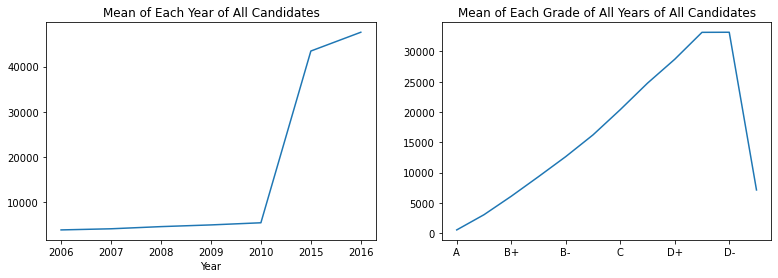

In [12]:
#Mean of Each Year of All Candidates
kcse_all_mean = kcse_all_candidates_years.mean(axis=1)
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title('Mean of Each Year of All Candidates')
kcse_all_mean.plot()

# Mean of Each Grade of All Years
plt.subplot(1,2,2)
plt.title('Mean of Each Grade of All Years of All Candidates')
kcse_all_mean_grades = kcse_all_candidates_years.mean(axis=0)
kcse_all_mean_grades.plot()

#### Trend of Performance of All Candidates' Grades (A To E) Over The Past Years

Text(0, 0.5, 'Percentages of The Total Grades')

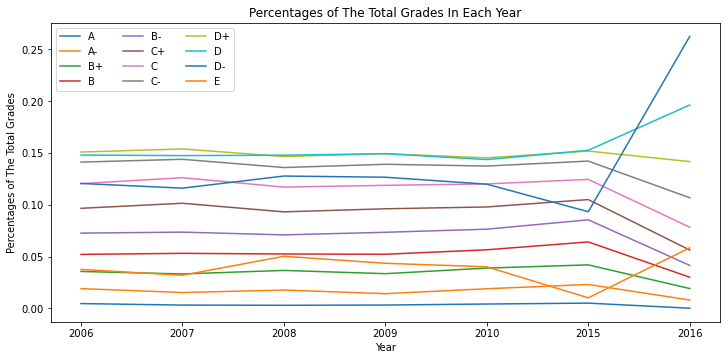

In [13]:
#Percentages of each grades per year then plot all grades
kcse_all_candidates = kcse_all_candidates_years.copy()
kcse_percent_A = kcse_all_candidates_years['A'] / kcse_all_candidates_years.sum(axis=1)
cols = kcse_all_candidates.columns
for i in range(len(cols)):
    kcse_all_candidates[cols[i]] = kcse_all_candidates_years[cols[i]] / kcse_all_candidates_years.sum(axis=1)
kcse_all_candidates.plot(figsize=(12,5.5),title="Percentages of The Total Grades In Each Year")
plt.legend(ncol=3,loc='upper left')
plt.ylabel('Percentages of The Total Grades')

#### Most Common Grade Scored Over The Past Years By All Candidates

<AxesSubplot:>

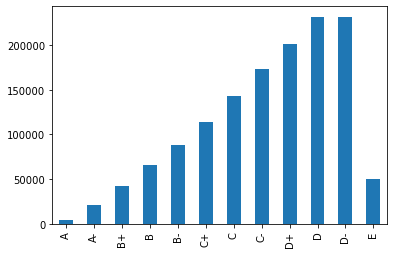

In [14]:
#added all grades over the past years to get the most common grade scored
kcse_all_candidates_years.sum(axis=0).plot(kind='bar')

#### Observation
Grade D and D have a small margein of difference,both being highest scored grade over the past years.

#### Conclusion
The most common grade scored over the past years is D followed by D-

## Gender Gap

#### Trend of Number of Males and Females Candidates and Gender Gap

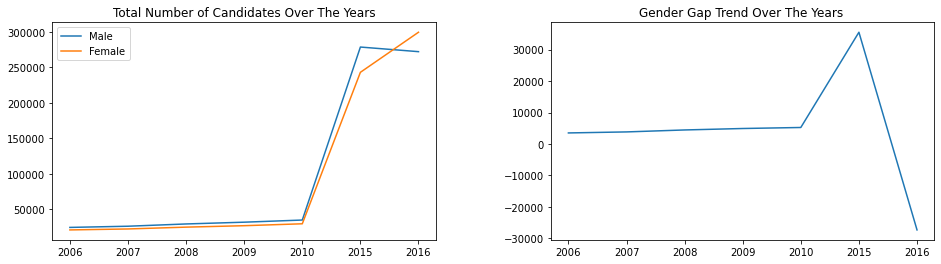

In [15]:
kcse_all_candidates_sum = kcse_all_candidates_years.sum(axis=1)
kcse_total_male = kcse_males_all_years.sum(axis=1)
kcse_total_female = kcse_females_all_years.sum(axis=1)
kcse_gender_gap = kcse_total_male - kcse_total_female
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Total Number of Candidates Over The Years")
plt.plot(kcse_total_male)
plt.plot(kcse_total_female)
plt.legend(['Male','Female'])
plt.subplot(1,2,2)
plt.title("Gender Gap Trend Over The Years ")
plt.plot(kcse_gender_gap)
plt.subplots_adjust(wspace=0.3,right=1)

<AxesSubplot:title={'center':'Percentage of Male and Female For 2016'}, ylabel='2016'>

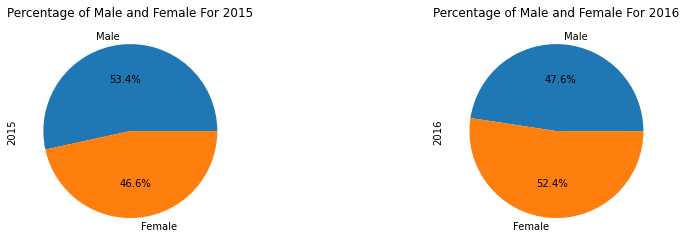

In [16]:
kcse_percentage_male = kcse_total_male / kcse_all_candidates_sum
kcse_percentage_female = kcse_total_female / kcse_all_candidates_sum
kcse_percentages = pd.concat([kcse_percentage_male,kcse_percentage_female],axis=1)
kcse_percentages.rename({0:'Male',1:'Female'},axis=1,inplace=True)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Percentage of Male and Female For 2015")
kcse_percentages.loc['2015'].plot(kind='pie',normalize=False,autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Percentage of Male and Female For 2016")
kcse_percentages.loc['2016'].plot(kind='pie',normalize=False,autopct='%1.1f%%')


#### Observation
 The number of total Male candidates is higher than Female candidates from 2006 - 2015 
 The number of total Female candidates is higher than Male candidates in the year 2016
 There is a high gender gap in the year 2015 where Males are higher by a total of 35534 

#### Conclusion
 Over The past years the number of Male candidates has exceeded the Female candidates until 2016 where there is a change

#### Trend of Total Number of All Candidates 

Text(0, 0.5, 'Number of Candidates')

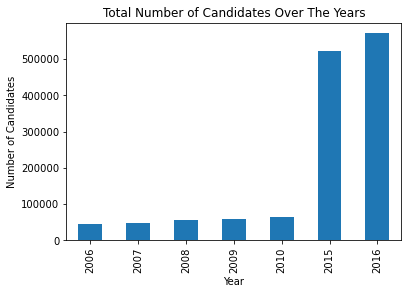

In [17]:
kcse_all_candidates_sum.plot(kind='bar',title="Total Number of Candidates Over The Years")
plt.ylabel("Number of Candidates")

#### Observation
The total number of candidates increased over the past years 
#### Conclusion
As years increase so does the number of total candidates.

## Trend of Quality Grades (A - C+) Vs Non Quality Grade (C - E)

### Male Vs Female

In [18]:
kcse_male_grade = kcse_males_all_years.copy()
colu= kcse_male_grade.columns
len_col = len(colu)
def get_grades(data_frame):
    """ 
    get_grades - function to calculate total of the grades (non quality and quality) for each year
    Description: Takes in data frame as an argument,
                get the total quality grade and non quality grade of year
                Assigns the results to a column of the data
    Args: data_frame (dataframe)
    Return: data frame
    """
    data_frame.insert(6,"Total Quality Grades",data_frame[data_frame.columns[:6]].sum(axis=1))
    data_frame.insert(13,"Total Non Quality Grades",data_frame[data_frame.columns[7:]].sum(axis=1))
    for i in range(len_col):
        if colu[i] != 'Total Non Quality Grades' and colu[i] != 'Total Quality Grades':
            data_frame.drop(columns=colu[i],inplace=True)
    return data_frame

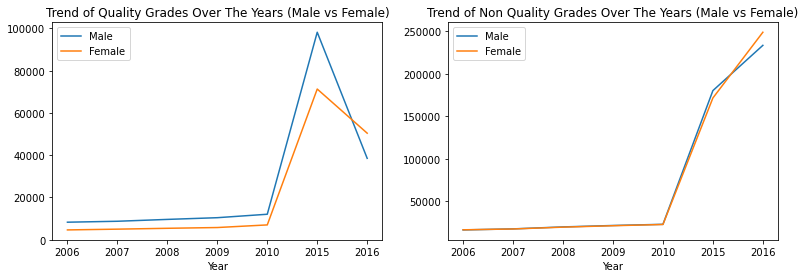

In [19]:
#To Get the Male Quality Grades and Non Quality
kcse_male_grade_quality = get_grades(kcse_male_grade)
#To Get the Female Quality Grades and Non Quality
kcse_female_grade = kcse_females_all_years.copy()
kcse_female_grade_quality = get_grades(kcse_female_grade)
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title("Trend of Quality Grades Over The Years (Male vs Female)")
kcse_male_grade_quality['Total Quality Grades'].plot()
kcse_female_grade_quality['Total Quality Grades'].plot()
plt.legend(['Male','Female'])
plt.subplot(1,2,2)
plt.title("Trend of Non Quality Grades Over The Years (Male vs Female)")
kcse_male_grade_quality['Total Non Quality Grades'].plot()
kcse_female_grade_quality['Total Non Quality Grades'].plot()
plt.legend(['Male','Female'])

In [20]:
def percent_quality(data_frame):
    """ 
    percent_quality - function to calculate percentages of the grades (non quality and quality)
    Description: Takes in data frame as an argument,creates a copy, 
                then get the percent of total quality grade and non quality grade
                Assigns the results to an index / row (Percent_Totals ) in the data_frame copy
    Args: data_frame (dataframe)
    Return: dataframe_copy
    """  
    dataframe_copy = data_frame.copy()
    dataframe_total_quality = dataframe_copy.sum(axis=0).loc['Total Quality Grades'] + dataframe_copy.sum(axis=0).loc['Total Non Quality Grades']
    dataframe_grade_quality_percent = dataframe_copy.sum(axis=0).loc['Total Quality Grades'] /dataframe_total_quality
    dataframe_grade_non_quality_percent = dataframe_copy.sum(axis=0).loc['Total Non Quality Grades'] /dataframe_total_quality
    dataframe_copy.loc['Percent_Totals'] = [dataframe_grade_quality_percent,dataframe_grade_non_quality_percent]
    return dataframe_copy

<AxesSubplot:title={'center':'Percent of Female Grades(Quality Grades vs Non Quality Grades)'}, ylabel='Percent_Totals'>

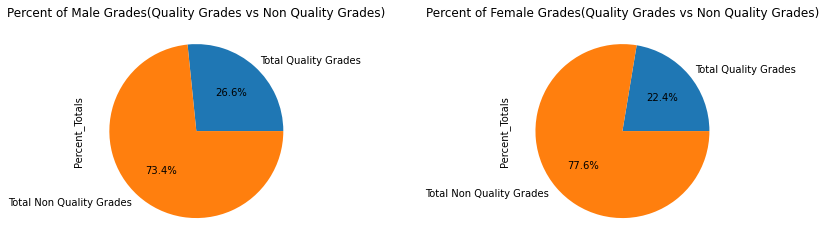

In [21]:
#Percentage grades for both quality and non quality (both male and female)
# Plotted for both male and female (Quality vs Non Quality)
kcse_male_percent_quality = percent_quality(kcse_male_grade_quality)
kcse_female_percent_quality = percent_quality(kcse_female_grade_quality)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Percent of Male Grades(Quality Grades vs Non Quality Grades)")
kcse_male_percent_quality.loc['Percent_Totals'].plot(kind='pie',autopct="%1.1f%%",normalize=False)
plt.subplot(1,2,2)
plt.title("Percent of Female Grades(Quality Grades vs Non Quality Grades)")
kcse_female_percent_quality.loc['Percent_Totals'].plot(kind='pie',autopct="%1.1f%%",normalize=False)

#### Observation
The Non Quality Grades are higher than the quality Grades over the past years
Males have a higher percentage of quality grades than females and a lower percentage of non-quality grades than females
#### Conclusion
Irrespective of the gender , the percentage of non quality grades superceded the percentage of quality grades
A total of 26.6% of Male candidates made the cut off while 22.4% of the Female candidates made the cut off

### All Candidates

#### Trend of Quality vs Non Quality Grades Over The Past Years for All Candidates

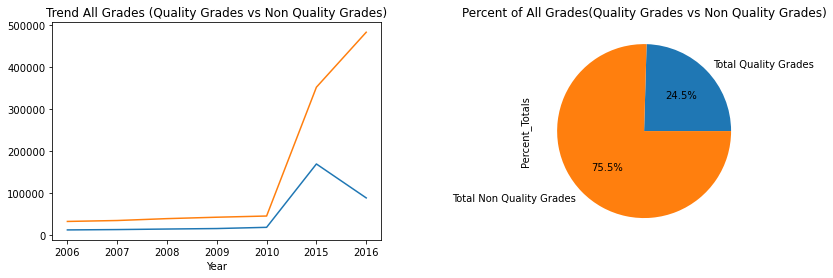

In [22]:
#Percentage grades for both quality and non quality (all candidates)
# Plotted for all candidates (Quality vs Non Quality) over the years and for the total years
kcse_all_grade = kcse_all_candidates_years.copy()
kcse_all_grade_quality = get_grades(kcse_all_grade)

kcse_all_percent_grade = percent_quality(kcse_all_grade_quality)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kcse_all_grade_quality)
plt.title("Trend All Grades (Quality Grades vs Non Quality Grades)")
plt.xlabel('Year')
plt.subplot(1,2,2)
plt.title("Percent of All Grades(Quality Grades vs Non Quality Grades)")
kcse_all_percent_grade.loc['Percent_Totals'].plot(kind='pie',autopct="%1.1f%%",normalize=False)
plt.subplots_adjust(wspace=0.3,right=1)

#### Observation
For all candidates the Non Quality Grades are higher than the Quality Grades over the past years
In 2016 there's a sharp decrease in the number of quality grades and also a sharp increase in the number of total non quality grades
Males have a higher percentage of quality grades than females and a lower percentage of non-quality grades than females
#### Conclusion
Irrespective of the year , the total number of non quality grades is generally higher than the total number of quality grades.

24.5% of All Candidates Meet the cut off points to university.

# Findings

#### Exception observation

In 2016

1. Total number of female candidates is higher than male candidates.
2. Total number of quality grades in female candidates is higher than that of male candidates.
3. Total number of non quality grades in female candidates is higher than that of male candidates.

# Conclusion

The number of candidates increases over the years.

Number of quality grades is lower than the number of non quality grades irrespective of the gender.

Generally, the number of male candidates is higher than the number of female candidates.

Male candidates perform better than the female candidates

More male candidates meet the cut off points compared to female candidates over the past years.

